# Analysis of Drug Poisoning Mortality in the U.S. (2001 - 2018)

In [47]:
#Python Libraries
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

In [3]:
drug_mort = pd.read_csv("Drug_Mortality_byState.csv")
drug_mort.head()

,State,Year,Sex,Age Group,Race and Hispanic Origin,Deaths,Population,Crude Death Rate,Standard Error for Crude Rate,Low Confidence Limit for Crude Rate,Upper Confidence Limit for Crude Rate,Age-adjusted Rate,Standard Error Age-adjusted Rate,Lower Confidence Limit for Age-adjusted Rate,Upper Confidence for Age-adjusted Rate,State Crude Rate in Range,US Crude Rate,US Age-adjusted Rate,Unit
0,United States,2003,Both Sexes,15–24,Hispanic,226,7255772,3.1148,0.20719,2.7087,3.5209,NaN,NaN,NaN,NaN,NaN,8.8881,8.8765,"per 100,000 population"
1,Alabama,1999,Both Sexes,All Ages,All Races-All Origins,169,4430143,3.8148,0.29344,3.2396,4.3899,3.8521,0.29657,3.2708,4.4334,1.8–7.5,6.0382,6.0570,"per 100,000 population"
2,Alabama,2000,Both Sexes,All Ages,All Races-All Origins,197,4447100,4.4299,0.31561,3.8112,5.0485,4.4857,0.31985,3.8588,5.1126,1.8–7.5,6.1882,6.1749,"per 100,000 population"
3,Alabama,2001,Both Sexes,All Ages,All Races-All Origins,216,4467634,4.8348,0.32896,4.1900,5.4795,4.8915,0.33329,4.2382,5.5447,1.8–7.5,6.8057,6.7922,"per 100,000 population"
4,Alabama,2002,Both Sexes,All Ages,All Races-All Origins,211,4480089,4.7097,0.32423,4.0742,5.3452,4.7619,0.32868,4.1177,5.4062,1.8–7.5,8.1766,8.1957,"per 100,000 population"


# Data Cleaning:

### Checking data types

In [10]:
drug_mort.dtypes

State                                            object
Year                                              int64
Sex                                              object
Age Group                                        object
Race and Hispanic Origin                         object
Deaths                                            int64
Population                                        int64
Crude Death Rate                                float64
Standard Error for Crude Rate                   float64
Low Confidence Limit for Crude Rate             float64
Upper Confidence Limit for Crude Rate           float64
Age-adjusted Rate                               float64
Standard Error Age-adjusted Rate                float64
Lower Confidence Limit for Age-adjusted Rate    float64
Upper Confidence for Age-adjusted Rate          float64
State Crude Rate in Range                        object
US Crude Rate                                   float64
US Age-adjusted Rate                            

All datatypes are valid for each column so no need for conversion

### Checking for Null values

In [9]:
drug_mort.isnull().sum()

State                                              0
Year                                               0
Sex                                                0
Age Group                                          0
Race and Hispanic Origin                           0
Deaths                                             0
Population                                         0
Crude Death Rate                                   0
Standard Error for Crude Rate                      0
Low Confidence Limit for Crude Rate                0
Upper Confidence Limit for Crude Rate              0
Age-adjusted Rate                               1920
Standard Error Age-adjusted Rate                1920
Lower Confidence Limit for Age-adjusted Rate    1920
Upper Confidence for Age-adjusted Rate          1920
State Crude Rate in Range                       1920
US Crude Rate                                      0
US Age-adjusted Rate                               0
Unit                                          

These Nan values are under the same 1920 rows which are all listed under rows with Age Group categories (0-14, 15-24, 25-34, etc.) so there is no Age-adjusted rate being calculated for those rows. In this case Nan may imply that those values are missing so we will fill them with the same values for Crude Death Rate indicating no age adjustment.

In [4]:
drug_mort['Age-adjusted Rate'] = drug_mort['Age-adjusted Rate'].fillna(drug_mort['Crude Death Rate'])
drug_mort['Standard Error Age-adjusted Rate'] = drug_mort['Standard Error Age-adjusted Rate'].fillna(drug_mort['Standard Error for Crude Rate'])
drug_mort['Lower Confidence Limit for Age-adjusted Rate'] = drug_mort['Lower Confidence Limit for Age-adjusted Rate'].fillna(drug_mort['Low Confidence Limit for Crude Rate'])
drug_mort['Upper Confidence for Age-adjusted Rate'] = drug_mort['Upper Confidence for Age-adjusted Rate'].fillna(drug_mort['Upper Confidence Limit for Crude Rate'])

#fill in with US Crude Rate since Nan values are under rows with "United States" as State
drug_mort['State Crude Rate in Range'] = drug_mort['State Crude Rate in Range'].fillna(drug_mort['US Crude Rate'])

drug_mort.isnull().sum()

State                                           0
Year                                            0
Sex                                             0
Age Group                                       0
Race and Hispanic Origin                        0
Deaths                                          0
Population                                      0
Crude Death Rate                                0
Standard Error for Crude Rate                   0
Low Confidence Limit for Crude Rate             0
Upper Confidence Limit for Crude Rate           0
Age-adjusted Rate                               0
Standard Error Age-adjusted Rate                0
Lower Confidence Limit for Age-adjusted Rate    0
Upper Confidence for Age-adjusted Rate          0
State Crude Rate in Range                       0
US Crude Rate                                   0
US Age-adjusted Rate                            0
Unit                                            0
dtype: int64

### The column title Race and Hispanic Origin and its values are slightly confusing so renamed to simplify messiness

In [5]:
drug_mort.rename(columns = {'Race and Hispanic Origin':'Race Origin'}, inplace = True)
#removing messy strings from matching rows
drug_mort['Race Origin'] = drug_mort['Race Origin'].str.replace('-All Origins', '') 
drug_mort['Race Origin'] = drug_mort['Race Origin'].str.replace('Non-Hispanic', '') 
#drug_mort.sample(15)

## Creating dataframe grouped by the different age groups (0-14, 15-24, 25-34, 35-45, 45-64, 65-74, & 75+) and another dataframe for "All Ages" for each state and entire U.S.

In [32]:
#use to see the different age groups in column
#drug_mort['Age Group'].sample(50)

#### Age grouped for entire U.S. 

Rows with specific age groups are only for the "United States" not individual states so no additional subsetting is needed

In [101]:
#Age Grouped for United States
age_grouped_us = drug_mort[drug_mort["Age Group"]!="All Ages"] 
#age_grouped_us.head()

#### All Ages for each state. 
Rows with "All Ages" are separated by each state and also for the United States so two subset dataframes are needed

In [79]:
#Ages by State
all_ages_state = drug_mort[drug_mort["Age Group"]=="All Ages"]
all_ages_state = all_ages_state[all_ages_state["State"]!="United States"]
#all_ages_state.head()

## Creating dataframe grouped by different Race Origins for each state and the entire U.S.

In [8]:
#use to see the different Race Origins in column
drug_mort['Race Origin'].sample(10)

2875        White
2244        White
347     All Races
2339    All Races
832     All Races
2926        White
987     All Races
1197     Hispanic
3077    All Races
1062    All Races
Name: Race Origin, dtype: object

#### All Race Origins for each state
There is data for each state and entire U.S. so two subset dataframes required

####  Race Origins (Hispanic, Non-Hispanic Black, and Non-Hispanic White) for Entire U.S.

In [10]:
#All races for each state
all_races_state = drug_mort[drug_mort['Race Origin']=="All Races"]
all_races_state = all_races_state[all_races_state['State']!="United States"]
#all_races_state.head()

In [98]:
#Other Race Origins for entire U.S.
other_races_US = drug_mort[drug_mort['Race Origin']!="All Races"]
other_races_US.head()

,State,Year,Sex,Age Group,Race Origin,Deaths,Population,Crude Death Rate,Standard Error for Crude Rate,Low Confidence Limit for Crude Rate,Upper Confidence Limit for Crude Rate,Age-adjusted Rate,Standard Error Age-adjusted Rate,Lower Confidence Limit for Age-adjusted Rate,Upper Confidence for Age-adjusted Rate,State Crude Rate in Range,US Crude Rate,US Age-adjusted Rate,Unit
0,United States,2003,Both Sexes,15–24,Hispanic,226,7255772,3.1148,0.20719,2.7087,3.5209,3.1148,0.20719,2.7087,3.5209,8.8881,8.8881,8.8765,"per 100,000 population"
276,United States,1999,Both Sexes,15–24,Hispanic,148,6316798,2.3430,0.19259,1.9655,2.7204,2.3430,0.19259,1.9655,2.7204,6.0382,6.0382,6.0570,"per 100,000 population"
311,United States,2000,Both Sexes,15–24,Hispanic,127,6581073,1.9298,0.17124,1.5941,2.2654,1.9298,0.17124,1.5941,2.2654,6.1882,6.1882,6.1749,"per 100,000 population"
931,United States,2001,Both Sexes,15–24,Hispanic,146,6855013,2.1298,0.17627,1.7843,2.4753,2.1298,0.17627,1.7843,2.4753,6.8057,6.8057,6.7922,"per 100,000 population"
1046,United States,2002,Both Sexes,15–24,Hispanic,199,7061858,2.8180,0.19976,2.4264,3.2095,2.8180,0.19976,2.4264,3.2095,8.1766,8.1766,8.1957,"per 100,000 population"


# Analysis:

### Total Deaths from 2000-2018

<IPython.core.display.Javascript object>


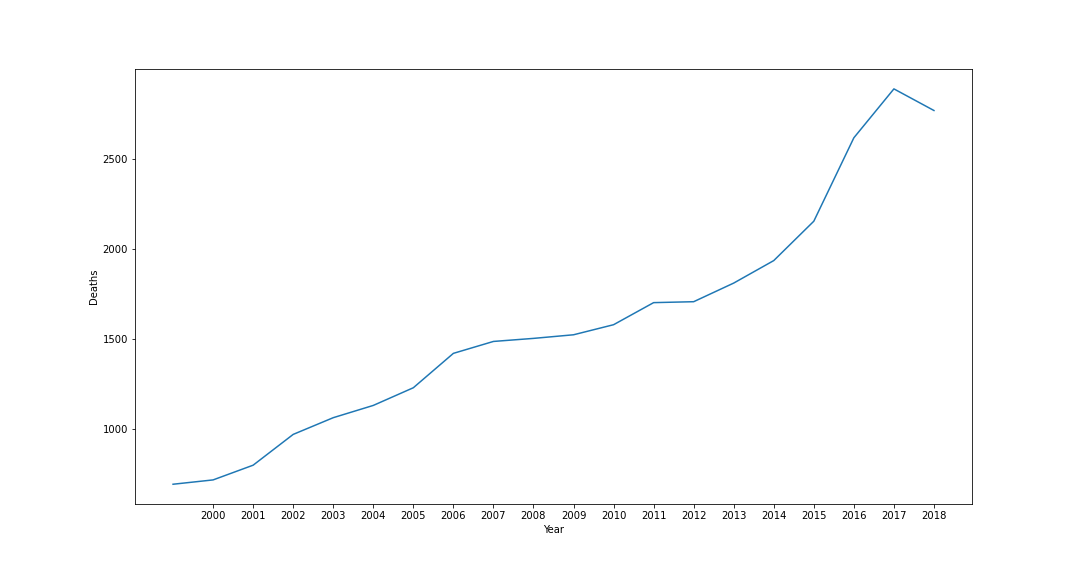

In [102]:
plt.figure(figsize=(15,8))
sb.lineplot(x = "Year", y = "Deaths", ci=None, data=age_grouped_us)
x_ticks = np.arange(2000, 2019, 1)
plt.xticks(x_ticks)
plt.show()

This line plot shows the total amount of drug mortalities in the U.S. from 2000-2018. Each year the number of deaths increase and by a few hundred and by 2014 there is a sharp increase that reaches its peak in 2017. This is strong evidence that drug mortalities have become more frequent each year. 

### State deaths by year

<IPython.core.display.Javascript object>


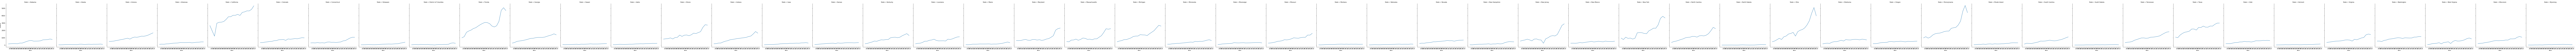

In [106]:
%matplotlib notebook
sb.relplot(x = "Year", y = "Deaths", col = "State", kind='line',ci=None, data=all_ages_state)
x_ticks = np.arange(2000, 2019, 1)
plt.xticks(x_ticks)
plt.show()

### Deaths by age group:

<IPython.core.display.Javascript object>


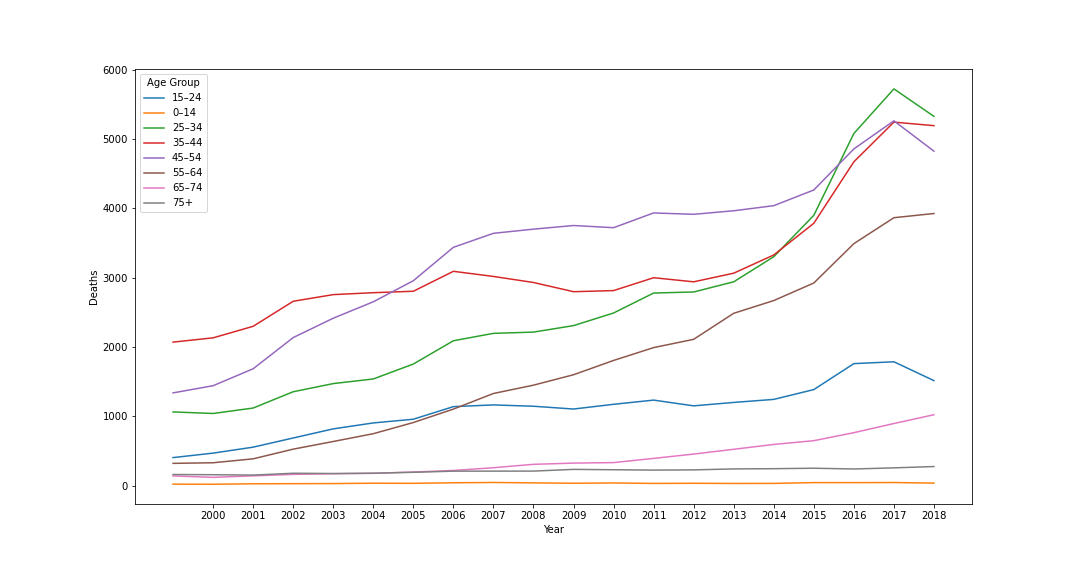

In [103]:
plt.figure(figsize=(15,8))
sb.lineplot(x = "Year", y = "Deaths", hue = "Age Group", ci=None, data=age_grouped_us)
x_ticks = np.arange(2000, 2019, 1)
plt.xticks(x_ticks)
plt.show()

### Deaths by Race

<IPython.core.display.Javascript object>


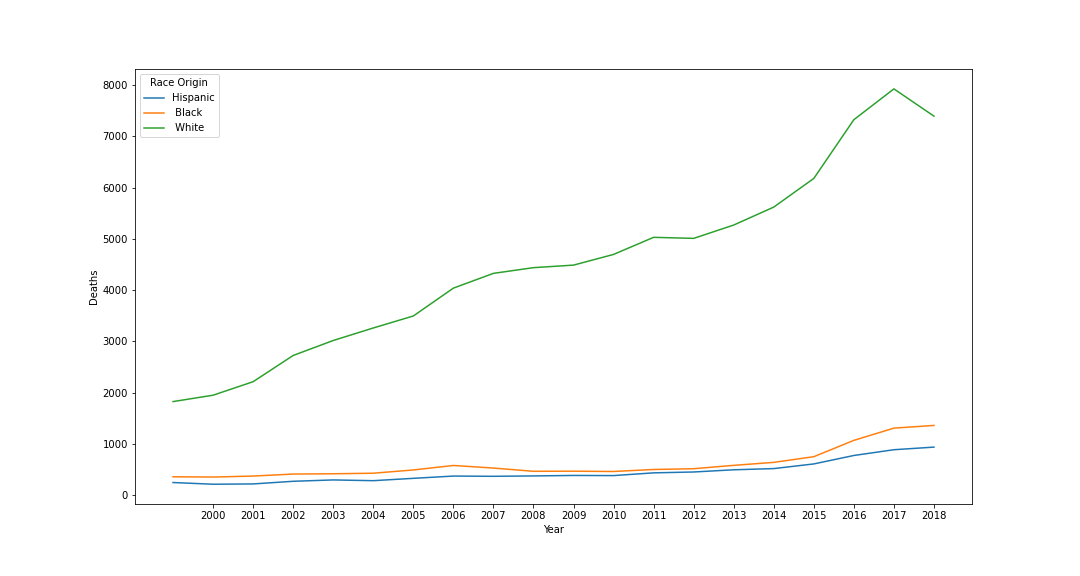

In [95]:
plt.figure(figsize=(15,8))
sb.lineplot(x = "Year", y = "Deaths", hue = "Race Origin", ci=None, data=other_races_US)
x_ticks = np.arange(2000, 2019, 1)
plt.xticks(x_ticks)
plt.show()